/var/folders/gr/fh3pk6q56hg8ncxzdy7xf06r0000gn/T/ipykernel_2111/2364436627.py:55: UserWarning: Glyph 24494 (\N{CJK UNIFIED IDEOGRAPH-5FAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/gr/fh3pk6q56hg8ncxzdy7xf06r0000gn/T/ipykernel_2111/2364436627.py:55: UserWarning: Glyph 20449 (\N{CJK UNIFIED IDEOGRAPH-4FE1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/gr/fh3pk6q56hg8ncxzdy7xf06r0000gn/T/ipykernel_2111/2364436627.py:55: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/gr/fh3pk6q56hg8ncxzdy7xf06r0000gn/T/ipykernel_2111/2364436627.py:55: UserWarning: Glyph 29255 (\N{CJK UNIFIED IDEOGRAPH-7247}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


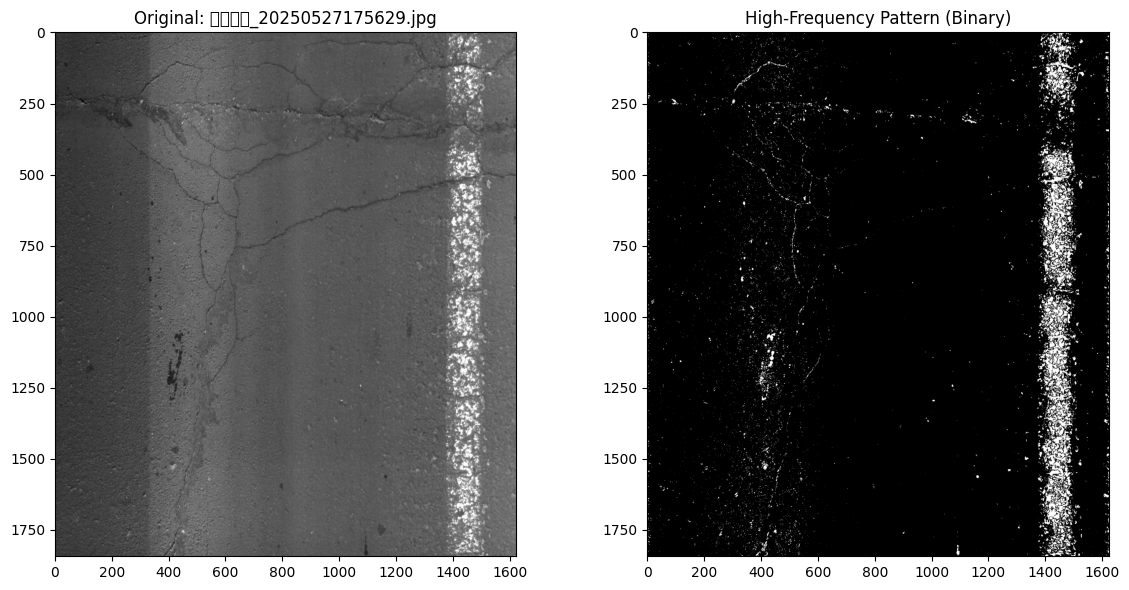

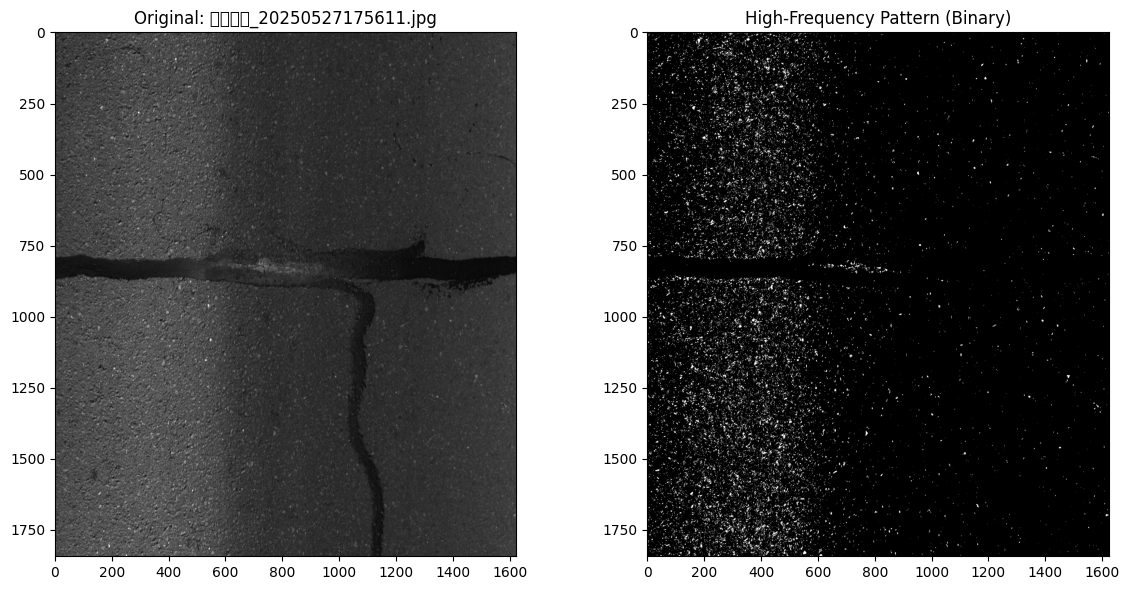

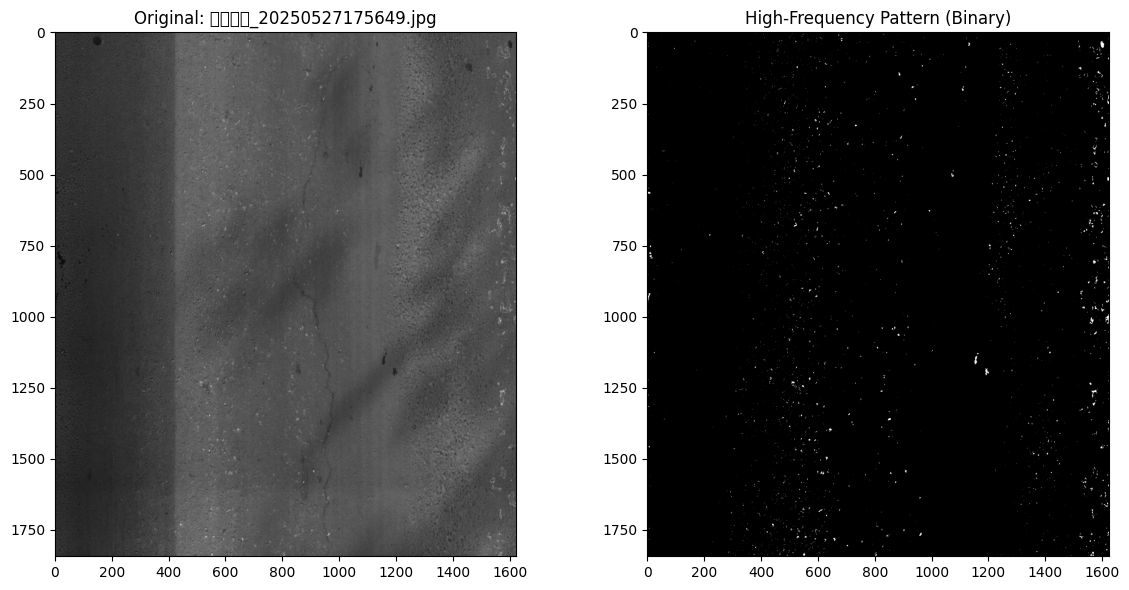

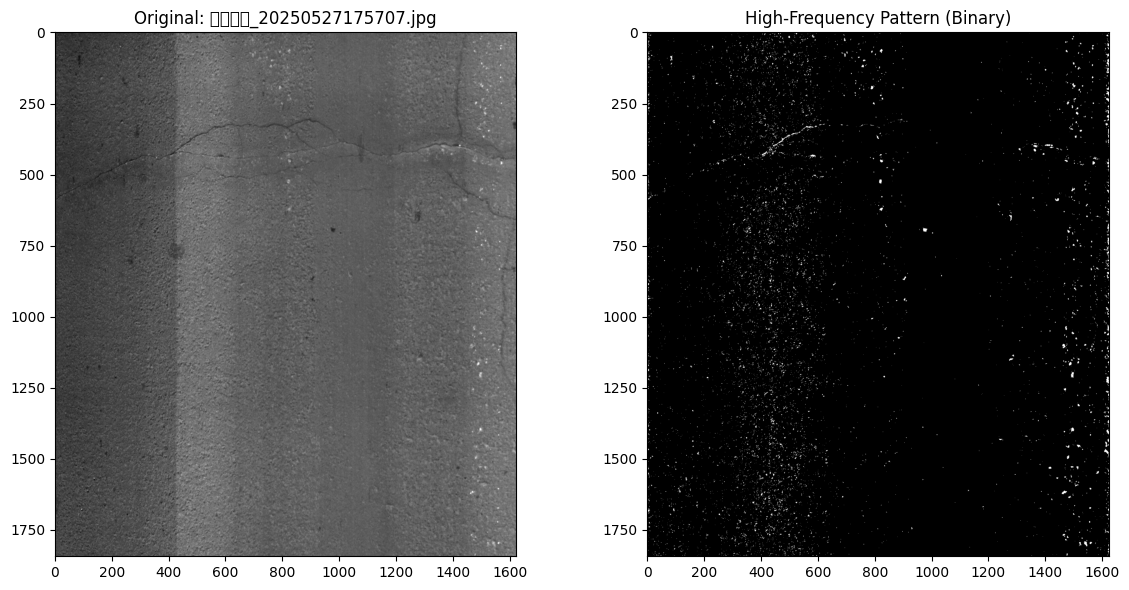

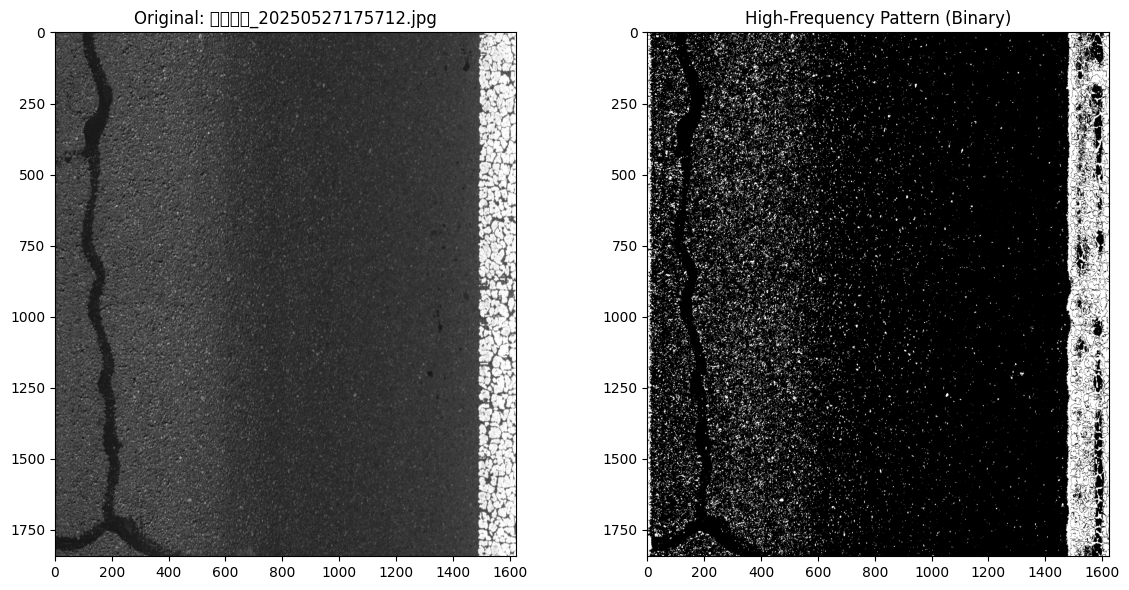

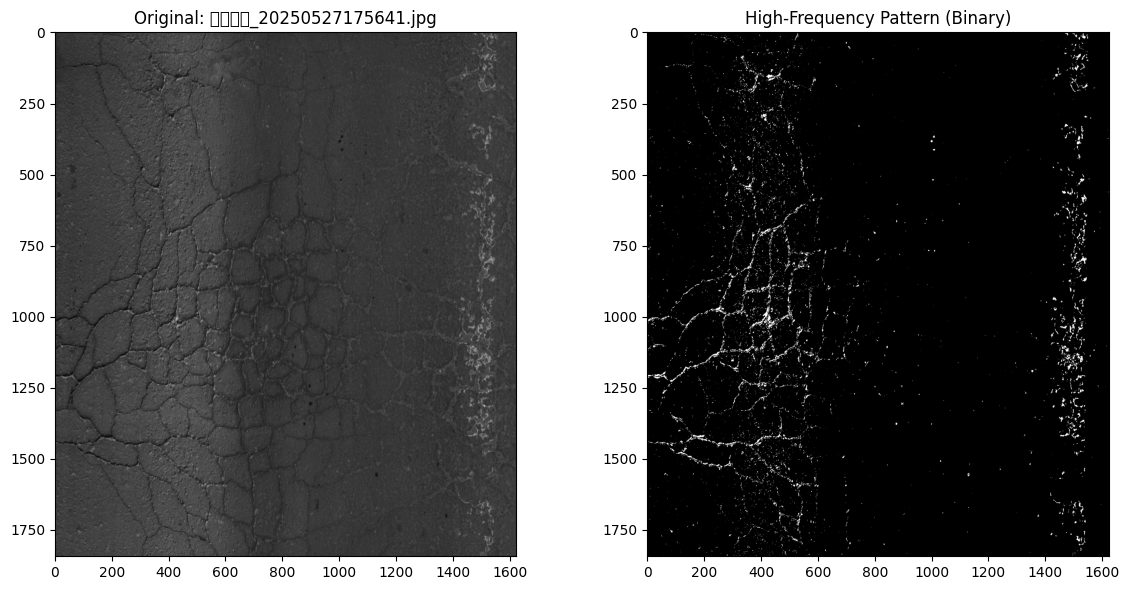

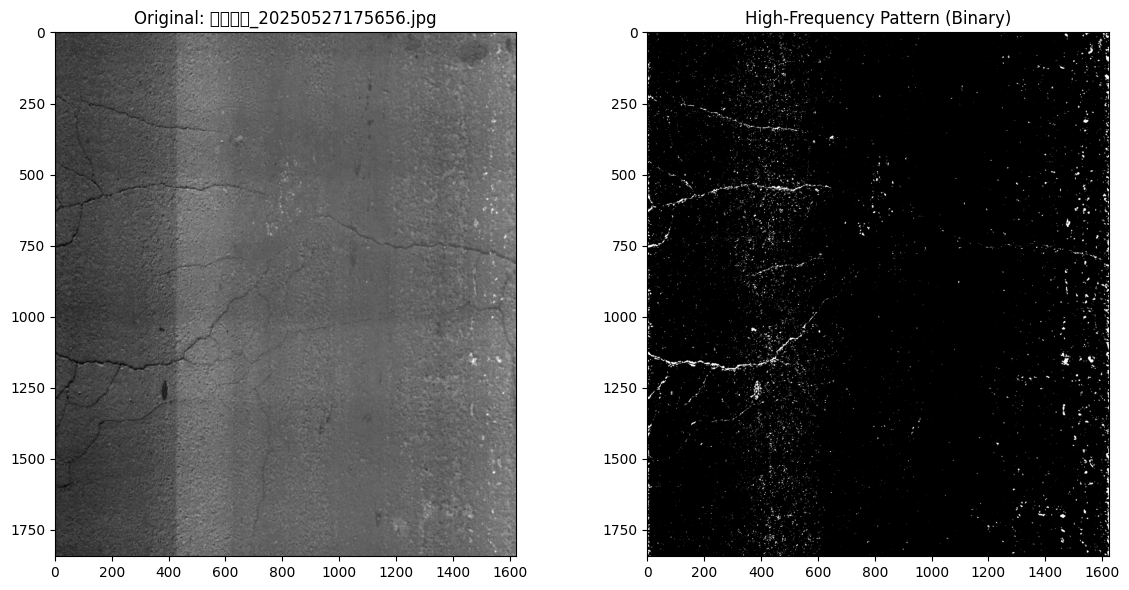

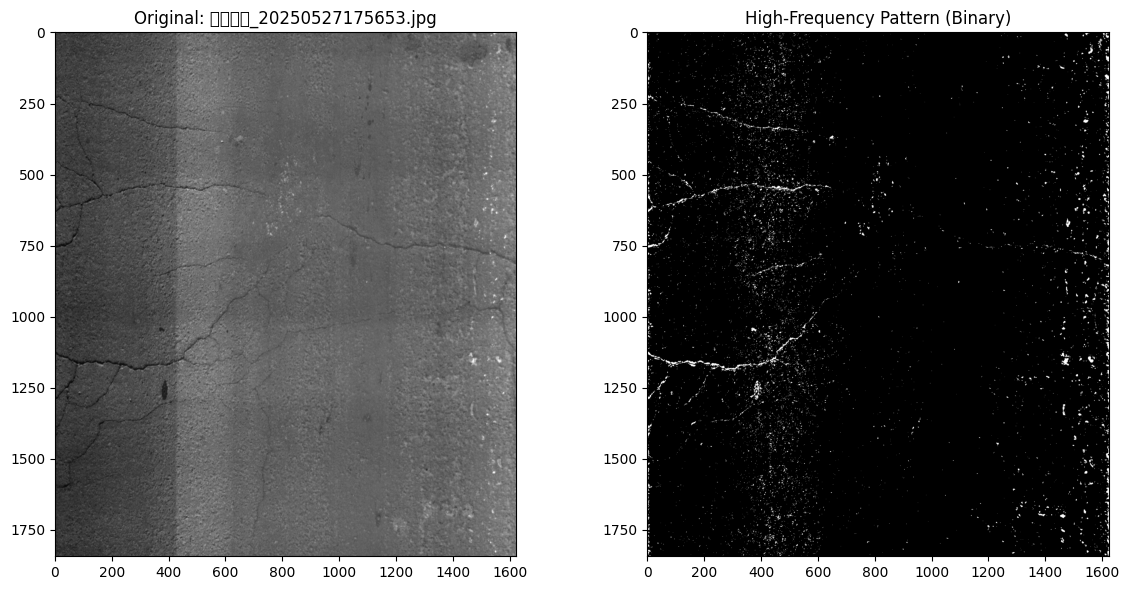

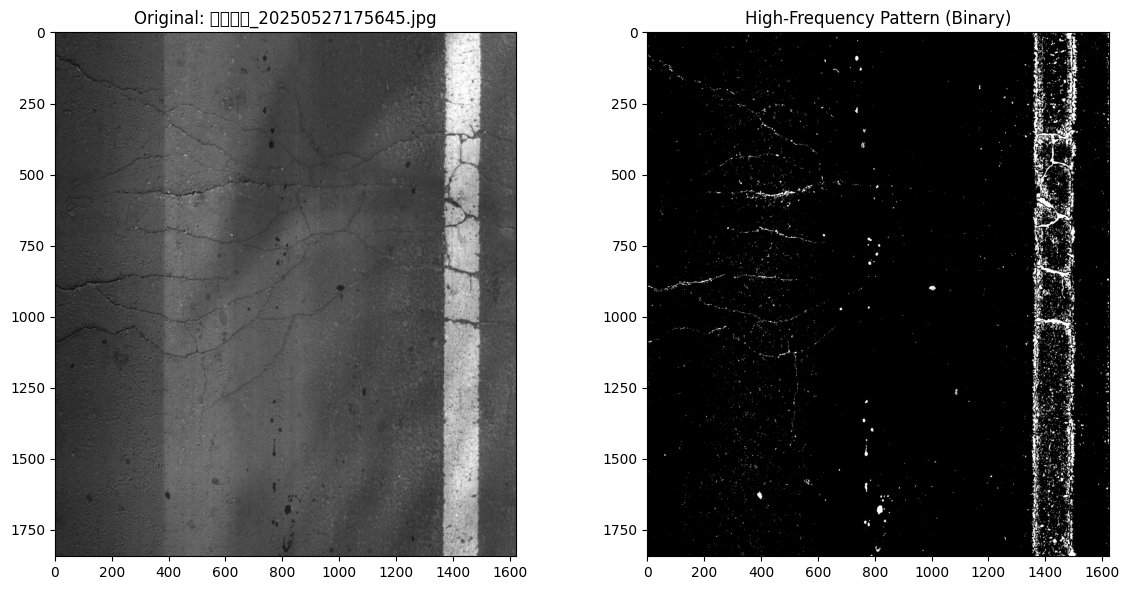

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob

# Set the folder path containing images
folder_path = "./images"  # Modify this path as needed
image_paths = glob(os.path.join(folder_path, "*.jpg"))  # You can add more extensions if needed

# High-pass filter parameters
radius = 20
threshold = 30  # Threshold to detect high-frequency areas

for img_path in image_paths:
    # Load grayscale image
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Failed to load {img_path}")
        continue

    # FFT and shift
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)

    # Get image size
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2

    # Create circular high-pass mask
    Y, X = np.ogrid[:rows, :cols]
    dist_from_center = np.sqrt((X - ccol)**2 + (Y - crow)**2)
    mask = dist_from_center > radius

    # Apply mask
    fshift_filtered = fshift * mask

    # Inverse FFT
    f_ishift = np.fft.ifftshift(fshift_filtered)
    img_ifft = np.fft.ifft2(f_ishift)
    img_filtered = np.abs(img_ifft)

    # Threshold to binary: 1 for high-frequency regions, 0 otherwise
    binary_highfreq = np.where(img_filtered > threshold, 1, 0).astype(np.uint8)

    # Display
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Original: {os.path.basename(img_path)}')

    plt.subplot(1, 2, 2)
    plt.imshow(binary_highfreq, cmap='gray')
    plt.title('High-Frequency Pattern (Binary)')
    plt.tight_layout()
    plt.show()
